# Trabalho 02 : realce e superresolução - 01/2021

**Nome:** Luís Felipe Ribeiro Chaves
 
**NUSP:** 10801221

BCC/018

In [3]:
import numpy as np
import imageio

import matplotlib.pyplot as plt

In [ ]:
ref = input().rstrip()
deg = input().rstrip()
typ = int(input())
alf = float(input())

if typ == 1:
    i1, i2, j1, j2 = (int(n) for n in input().rstrip().split(' '))
    siz = int(input())
    mod = input().rstrip()
elif typ == 2:
    siz = int(input())
    std = float(input())

img = imageio.imread(deg)
ref_img = imageio.imread(ref)

In [4]:
typ = 2

if typ == 1:
    ref = 'InputImages/polygons128.png'
    deg = 'InputImages/case1_10.png'
    alf = 0.15
    i1, i2, j1, j2 = (0, 20, 0, 20)
    siz = 5
    mod = 'average'
elif typ == 2:
    ref = 'InputImages/polygons128.png'
    deg = 'InputImages/case5_5_1.png'
    alf = 0.00005
    siz = 5
    std = 1.0
    
img = imageio.imread(deg)
ref_img = imageio.imread(ref)

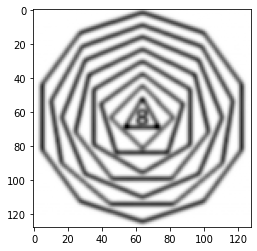

In [5]:
plt.imshow(img, cmap='gray')

In [6]:
def gaussian_filter (k=3, sigma=1.0):
    arx = np.arange((-k // 2 ) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx , arx)
    filt = np.exp(-(1/2)*(np.square(x) + np.square(y)) / np.square(sigma))
    return filt/np.sum(filt)

In [7]:
if typ == 1:
    dispn = None
    sampled_region = img[i1:i2, j1:j2]
    if mod == 'average':
        dispn = np.var(sampled_region)
    elif mod == 'robust':
        q75, q25 = np.percentile(sampled_region, [75, 25])
        dispn = q75 - q25
        
    if dispn == 0:
        dispn = 1
    
    resulting_img = np.zeros(img.shape)
    padded_img = np.pad(img, siz, 'symmetric')
    
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sampled_region = padded_img[i : i + siz * 2, j : j + siz * 2]
            if mod == 'average':
                displ = np.var(sampled_region)
                centr = np.mean(sampled_region)
            elif mod == 'robust':
                q75, centr, q25 = np.percentile(sampled_region, [75, 50, 25])
                displ = q75 - q25

            if displ == 0:
                displ = dispn
            
            resulting_img[i, j] = img[i, j] - alf * (dispn / displ) * (img[i, j] - centr)
elif typ == 2:
    laplacian_op = np.array([
        [ 0, -1,  0],
        [-1,  4, -1],
        [ 0, -1,  0],
    ])
    
    h = gaussian_filter(siz, std)
    padded_h = np.pad(h, ((img.shape[0] - h.shape[0]) // 2, (img.shape[1] - h.shape[1] + 1) // 2))
    padded_laplacian_op = np.pad(laplacian_op, ((img.shape[0] - laplacian_op.shape[0]) // 2, (img.shape[1] - laplacian_op.shape[1] + 1) // 2))
    
    G = np.fft.rfft2(img)
    H = np.fft.rfft2(padded_h)
    H_ = np.conjugate(H)
    P = np.fft.rfft2(padded_laplacian_op)
    
    F_ = (np.abs(H_) / (np.abs(H) ** 2 + alf * np.abs(P) ** 2)) * G
    
    resulting_img = np.fft.irfft2(F_)

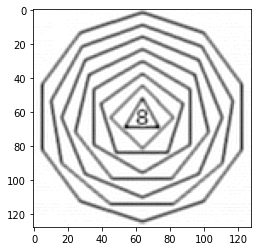

In [8]:
plt.imshow(resulting_img, cmap='gray', vmin=0, vmax=255)

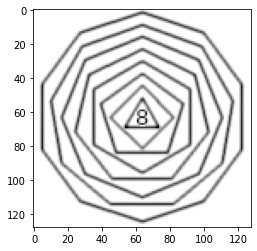

In [9]:
plt.imshow(ref_img, cmap='gray')

In [10]:
rmse = np.sqrt(np.mean((resulting_img - ref_img) ** 2))
print(rmse)

7.02514300333862
